# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Final term project</b></u>

### Roster Name: Thai Quach
### Preferred Name (if different): Thai Quach
### Student ID: 012690418
### Email address: thai.quach@sjsu.edu
SSD modal executed from pre-implemented code (Source Below)

##  <u> Project description/introduction text (the background information) </u>

This project attempts a convolutional neural network (CNN) problem of multiple objects detection using the Single Shot MultiBox Detector (SSD) architecture. Convolutional neural networks allow the classification of images into objects. This supervising training method feeds images and labels of the images to a neural network; the end product is a CNN model that is able to classify images into objects or animals. However, a CNN classification model is unable to operate when an image contains multiple objects - leading to failures and wrong predictions. With this, it is important to develop a multi-object detection and classification CNN model that is able to predict multiple objects in an image. Such functionality is important in projects of intelligent robots, cars, and other autonomous systems that rely on visualization for classification. 

There are many CNN architectures out there that solves this problem of multi-object detection and classification. The simplest solution of which is a sliding window technique that splits an image into multiple parts and sizes then feeds each into a CNN classification model to classify them. However this technique required too much time and process power - making it not optimal for autonomous production.

![image](https://user-images.githubusercontent.com/18486562/142745015-6d7ac973-d547-4632-a25c-0797b05b1d74.png)  

Figure 1: Sliding window example

As time passes, new techniques arrive. The three foundation architectures of multi-object classification are R-CNN, Fast R-CNN, and Faster-R-CNN - with each successor becoming faster and more efficient. The foundation of Regional-CNN (R-CNN) is to use another model to propose regions of possible objects and feed each region into the classification model.

![image](https://user-images.githubusercontent.com/18486562/142745016-a4cd6092-ee15-4969-b499-d4657f67d873.png)

Figure 2: Faster R-CNN Architecture Illustration

With much modernizing, the latest successor of R-CNN, Faster R-CNN was finally fast enough for real time object detection, running at 1 image per second. However this speed was not enough and there were still many issues with detecting object regions with different sizes (J. Hui, 2018).

Finally, YOLO (You Only Look Once) and SSD (Single Shot MultiBox Detector) arrived. With optimized architectures and techniques, these models utilize Anchor Boxes and look at each image only one. Unlike sliding windows or R-CNN which look at multiple regions one-by-one, YOLO and SSD architectures are robust enough to look at many regions of a single image in one pass through the network; returning both the location and the classification of possible objects on the image.

![image](https://user-images.githubusercontent.com/18486562/142745020-ff099c42-6625-408d-bb8d-1858dddb2afe.png)

Figure 3: Anchor boxes in a YOLO architecture

YOLO is able to achieve 45 FPS (frame per second) in real time while its successor, SSD achieves 59 FPS at 74.3% mAP. This project plans to implement an SSD architecture model using Tensorflow 2.0 to perform multi-object detection.


##  <u> Machine learning algorithm selected for this project </u>

SSD (Single Shot MultiBox Detector) arrived. With optimized architectures and techniques, these models utilize Anchor Boxes and look at each image only one. Unlike sliding windows or R-CNN which look at multiple regions one-by-one, YOLO and SSD architectures are robust enough to look at many regions of a single image in one pass through the network; returning both the location and the classification of possible objects on the image.

![image](https://user-images.githubusercontent.com/18486562/142745058-35b56ec5-42bc-4915-a37d-94b728c244f9.png)

Figure 4: SSD Architecture

Moreover, SSD's architecture allows it to locate objects of multiple sizes at once and faster than YOLO. YOLO is able to achieve 45 FPS (frame per second) in real-time while its successor, SSD achieves 59 FPS at 74.3% mAP.

![image](https://user-images.githubusercontent.com/18486562/142745054-8ad0f843-5e55-4973-a599-ab633c542a8e.png)

Figure 5: Anchor boxes samples of SSD

##  <u> Dataset source </u>

* Class labels are transformed from text to number:
    * `[Plane, Dog, Car,...,background]` = `{0,1,2,...,n+1}`
* Each image is randomly preprocessed with one of the preprocesses:
    * `random_[brightness, contrast, hue, saturation, patch, horizontal_rotation]`
* Images pixel are normalized to 255 per pixel and scale to 300x300px (300,300,3)
* Bouding-Box coordinates are converted/scale to the correct new scale

##  <u> References and sources </u>

SSD Architecture Source Code:
[https://github.com/FurkanOM/tf-ssd](https://github.com/FurkanOM/tf-ssd)

    * Noticed: This jupyter notebook was ran in conjunction of this repo
    * All codes below were a modified replication of the original

Images and SSD simplified articles:
[https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11](https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11)

# Solution

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam
import augmentation
from ssd_loss import CustomLoss
from utils import bbox_utils, data_utils, io_utils, train_utils
from tensorflow_datasets import show_examples

In [2]:
#Hyper-parameters
batch_size = 10
epochs = 150
load_weights = False
backbone = "vgg16"
io_utils.is_valid_backbone(backbone)

In [3]:
#
if backbone == "mobilenet_v2":
    from models.ssd_mobilenet_v2 import get_model, init_model
else:
    from models.ssd_vgg16 import get_model, init_model
#
hyper_params = train_utils.get_hyper_params(backbone)
hyper_params

{'img_size': 300,
 'feature_map_shapes': [38, 19, 10, 5, 3, 1],
 'aspect_ratios': [[1.0, 2.0, 0.5],
  [1.0, 2.0, 0.5, 3.0, 0.3333333333333333],
  [1.0, 2.0, 0.5, 3.0, 0.3333333333333333],
  [1.0, 2.0, 0.5, 3.0, 0.3333333333333333],
  [1.0, 2.0, 0.5],
  [1.0, 2.0, 0.5]],
 'iou_threshold': 0.5,
 'neg_pos_ratio': 3,
 'loc_loss_alpha': 1,
 'variances': [0.1, 0.1, 0.2, 0.2]}

In [4]:
#load train/validation data VOC2007
train_data, info = data_utils.get_dataset("voc/2007", "train")
val_data, _ = data_utils.get_dataset("voc/2007", "validation")
train_total_items = data_utils.get_total_item_size(info, "train")
val_total_items = data_utils.get_total_item_size(info, "validation")

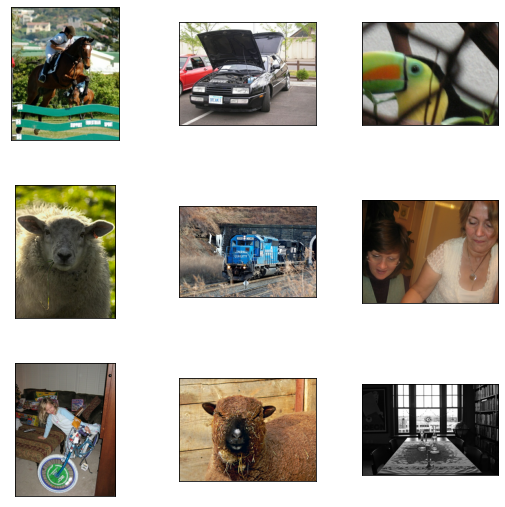

In [5]:
#Visualize data
fig = show_examples(train_data, info)

In [6]:
#load labels
labels = data_utils.get_labels(info)
labels = ["bg"] + labels
hyper_params["total_labels"] = len(labels)
img_size = hyper_params["img_size"]
labels,img_size

(['bg',
  'aeroplane',
  'bicycle',
  'bird',
  'boat',
  'bottle',
  'bus',
  'car',
  'cat',
  'chair',
  'cow',
  'diningtable',
  'dog',
  'horse',
  'motorbike',
  'person',
  'pottedplant',
  'sheep',
  'sofa',
  'train',
  'tvmonitor'],
 300)

In [7]:
#preprocessing images
train_data = train_data.map(lambda x : data_utils.preprocessing(x, img_size, img_size, augmentation.apply))
val_data = val_data.map(lambda x : data_utils.preprocessing(x, img_size, img_size))
#Reshape
data_shapes = data_utils.get_data_shapes()
padding_values = data_utils.get_padding_values()
train_data = train_data.shuffle(batch_size*4).padded_batch(batch_size, padded_shapes=data_shapes, padding_values=padding_values)
val_data = val_data.padded_batch(batch_size, padded_shapes=data_shapes, padding_values=padding_values)

In [8]:
#init model
ssd_model = get_model(hyper_params)
ssd_custom_losses = CustomLoss(hyper_params["neg_pos_ratio"], hyper_params["loc_loss_alpha"])
ssd_model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss=[ssd_custom_losses.loc_loss_fn, ssd_custom_losses.conf_loss_fn])
init_model(ssd_model)

In [9]:
#Load weight?
ssd_model_path = io_utils.get_model_path(backbone)
if load_weights:
    ssd_model.load_weights(ssd_model_path)
ssd_log_path = io_utils.get_log_path(backbone)
# We calculate prior boxes
prior_boxes = bbox_utils.generate_prior_boxes(hyper_params["feature_map_shapes"], hyper_params["aspect_ratios"])
ssd_train_feed = train_utils.generator(train_data, prior_boxes, hyper_params)
ssd_val_feed = train_utils.generator(val_data, prior_boxes, hyper_params)

In [10]:
#training callbacks for Tensorboards and Saving
checkpoint_callback = ModelCheckpoint(ssd_model_path, monitor="val_loss", save_best_only=True, save_weights_only=True)
tensorboard_callback = TensorBoard(log_dir=ssd_log_path)
learning_rate_callback = LearningRateScheduler(train_utils.scheduler, verbose=0)

In [11]:
#train
step_size_train = train_utils.get_step_size(train_total_items, batch_size)
step_size_val = train_utils.get_step_size(val_total_items, batch_size)
ssd_model.fit(ssd_train_feed,
              steps_per_epoch=step_size_train,
              validation_data=ssd_val_feed,
              validation_steps=step_size_val,
              epochs=epochs,
              callbacks=[checkpoint_callback, tensorboard_callback, learning_rate_callback])

Epoch 1/150
251/251 [==============================] - 224s 836ms/step - loss: 10.2698 - loc_loss: 2.5239 - conf_loss: 6.0997 - val_loss: 8.4639 - val_loc_loss: 2.3611 - val_conf_loss: 4.9130
Epoch 2/150
251/251 [==============================] - 181s 722ms/step - loss: 8.2650 - loc_loss: 2.3920 - conf_loss: 4.8465 - val_loss: 8.1161 - val_loc_loss: 2.3645 - val_conf_loss: 4.8584
Epoch 3/150
251/251 [==============================] - 182s 724ms/step - loss: 7.9298 - loc_loss: 2.3612 - conf_loss: 4.7687 - val_loss: 7.9666 - val_loc_loss: 2.3438 - val_conf_loss: 4.9057
Epoch 4/150
251/251 [==============================] - 182s 725ms/step - loss: 7.7950 - loc_loss: 2.3693 - conf_loss: 4.7732 - val_loss: 7.6784 - val_loc_loss: 2.3194 - val_conf_loss: 4.7659
Epoch 5/150
251/251 [==============================] - 192s 766ms/step - loss: 7.6077 - loc_loss: 2.3503 - conf_loss: 4.7147 - val_loss: 7.6675 - val_loc_loss: 2.3484 - val_conf_loss: 4.8232
Epoch 6/150
251/251 [=======================

# Training / Validating performance (from Tensorboard)

![image](https://user-images.githubusercontent.com/18486562/142803817-fdf0e59c-4486-4564-9cf3-96ae0acd408a.png)

![image](https://user-images.githubusercontent.com/18486562/142803856-43fc7ab6-bb55-4d67-b0f8-1a47876fa5e5.png)

# Evaluate

In [1]:
import tensorflow as tf
from utils import bbox_utils, data_utils, drawing_utils, io_utils, train_utils, eval_utils
from models.decoder import get_decoder_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
from PIL import Image, ImageDraw

In [2]:
#Params
batch_size = 10
evaluate = False
use_custom_images = False
custom_image_path = "data/images/"
backbone = "mobilenet_v2"
io_utils.is_valid_backbone(backbone)

#
if backbone == "mobilenet_v2":
    from models.ssd_mobilenet_v2 import get_model, init_model
else:
    from models.ssd_vgg16 import get_model, init_model
#
hyper_params = train_utils.get_hyper_params(backbone)
#
test_data, info = data_utils.get_dataset("voc/2007", "test")
total_items = data_utils.get_total_item_size(info, "test")
labels = data_utils.get_labels(info)
labels = ["bg"] + labels
hyper_params["total_labels"] = len(labels)
img_size = hyper_params["img_size"]

data_types = data_utils.get_data_types()
data_shapes = data_utils.get_data_shapes()
padding_values = data_utils.get_padding_values()

if use_custom_images:
    img_paths = data_utils.get_custom_imgs(custom_image_path)
    total_items = len(img_paths)
    test_data = tf.data.Dataset.from_generator(lambda: data_utils.custom_data_generator(
                                               img_paths, img_size, img_size), data_types, data_shapes)
else:
    test_data = test_data.map(lambda x : data_utils.preprocessing(x, img_size, img_size, evaluate=evaluate))

test_data = test_data.padded_batch(batch_size, padded_shapes=data_shapes, padding_values=padding_values)


In [3]:
#load model
ssd_model = get_model(hyper_params)
ssd_model_path = io_utils.get_model_path(backbone)
ssd_model.load_weights(ssd_model_path)

#Predicting test sets
prior_boxes = bbox_utils.generate_prior_boxes(hyper_params["feature_map_shapes"], hyper_params["aspect_ratios"])
ssd_decoder_model = get_decoder_model(ssd_model, prior_boxes, hyper_params)

step_size = train_utils.get_step_size(total_items, batch_size)
pred_bboxes, pred_labels, pred_scores = ssd_decoder_model.predict(test_data, steps=step_size, verbose=2)

496/496 - 32s - 32s/epoch - 65ms/step


# Analysis

In [4]:
#Evaluate module
def init_stats(labels):
    stats = {}
    for i, label in enumerate(labels):
        if i == 0:
            continue
        stats[i] = {
            "label": label,
            "total": 0,
            "tp": [],
            "fp": [],
            "scores": [],
        }
    return stats

def update_stats(pred_bboxes, pred_labels, pred_scores, gt_boxes, gt_labels, stats):
    iou_map = bbox_utils.generate_iou_map(pred_bboxes, gt_boxes)
    merged_iou_map = tf.reduce_max(iou_map, axis=-1)
    max_indices_each_gt = tf.argmax(iou_map, axis=-1, output_type=tf.int32)
    sorted_ids = tf.argsort(merged_iou_map, direction="DESCENDING")
    #
    count_holder = tf.unique_with_counts(tf.reshape(gt_labels, (-1,)))
    for i, gt_label in enumerate(count_holder[0]):
        if gt_label == -1:
            continue
        gt_label = int(gt_label)
        stats[gt_label]["total"] += int(count_holder[2][i])
    for batch_id, m in enumerate(merged_iou_map):
        true_labels = []
        for i, sorted_id in enumerate(sorted_ids[batch_id]):
            pred_label = pred_labels[batch_id, sorted_id]
            if pred_label == 0:
                continue
            #
            iou = merged_iou_map[batch_id, sorted_id]
            gt_id = max_indices_each_gt[batch_id, sorted_id]
            gt_label = int(gt_labels[batch_id, gt_id])
            pred_label = int(pred_label)
            score = pred_scores[batch_id, sorted_id]
            stats[pred_label]["scores"].append(score)
            stats[pred_label]["tp"].append(0)
            stats[pred_label]["fp"].append(0)
            if iou >= 0.5 and pred_label == gt_label and gt_id not in true_labels:
                stats[pred_label]["tp"][-1] = 1
                true_labels.append(gt_id)
            else:
                stats[pred_label]["fp"][-1] = 1
            #
        #
    #
    return stats

def calculate_ap(recall, precision):
    ap = 0
    for r in np.arange(0, 1.1, 0.1):
        prec_rec = precision[recall >= r]
        if len(prec_rec) > 0:
            ap += np.amax(prec_rec)
    # By definition AP = sum(max(precision whose recall is above r))/11
    ap /= 11
    return ap

def calculate_mAP(stats):
    aps = []
    for label in stats:
        label_stats = stats[label]
        tp = np.array(label_stats["tp"])
        fp = np.array(label_stats["fp"])
        scores = np.array(label_stats["scores"])
        ids = np.argsort(-scores)
        total = label_stats["total"]
        accumulated_tp = np.cumsum(tp[ids])
        accumulated_fp = np.cumsum(fp[ids])
        recall = accumulated_tp / total
        precision = accumulated_tp / (accumulated_fp + accumulated_tp)
        ap = calculate_ap(recall, precision)
        stats[label]["recall"] = recall
        stats[label]["precision"] = precision
        stats[label]["AP"] = ap
        aps.append(ap)
    mAP = np.mean(aps)
    return stats, mAP

def evaluate_predictions(dataset, pred_bboxes, pred_labels, pred_scores, labels, batch_size):
    stats = init_stats(labels)

    for batch_id, image_data in enumerate(dataset):
        imgs, gt_boxes, gt_labels = image_data
        start = batch_id * batch_size
        end = start + batch_size
        batch_bboxes, batch_labels, batch_scores = pred_bboxes[start:end], pred_labels[start:end], pred_scores[start:end]
        stats = update_stats(batch_bboxes, batch_labels, batch_scores, gt_boxes, gt_labels, stats)

    stats, mAP = calculate_mAP(stats)
    print("mAP: {}".format(float(mAP)))
    return stats, mAP

In [5]:
#draw modules
def draw_grid_map(img, grid_map, stride):
    """Drawing grid intersection on given image.
    inputs:
        img = (height, width, channels)
        grid_map = (output_height * output_width, [y_index, x_index, y_index, x_index])
            tiled x, y coordinates
        stride = number of stride
    outputs:
        array = (height, width, channels)
    """
    image = Image.fromarray(img)
    draw = ImageDraw.Draw(image)
    counter = 0
    for grid in grid_map:
        draw.rectangle((
            grid[0] + stride // 2 - 2,
            grid[1] + stride // 2 - 2,
            grid[2] + stride // 2 + 2,
            grid[3] + stride // 2 + 2), fill=(255, 255, 255, 0))
        counter += 1
    plt.figure()
    plt.imshow(image)
    plt.show()

def draw_bboxes(imgs, bboxes):
    """Drawing bounding boxes on given images.
    inputs:
        imgs = (batch_size, height, width, channels)
        bboxes = (batch_size, total_bboxes, [y1, x1, y2, x2])
            in normalized form [0, 1]
    """
    colors = tf.constant([[1, 0, 0, 1]], dtype=tf.float32)
    imgs_with_bb = tf.image.draw_bounding_boxes(imgs, bboxes, colors)
    plt.figure()
    for img_with_bb in imgs_with_bb:
        plt.imshow(img_with_bb)
        plt.show()

def draw_bboxes_with_labels(img, bboxes, label_indices, probs, labels):
    """Drawing bounding boxes with labels on given image.
    inputs:
        img = (height, width, channels)
        bboxes = (total_bboxes, [y1, x1, y2, x2])
            in denormalized form
        label_indices = (total_bboxes)
        probs = (total_bboxes)
        labels = [labels string list]
    """
    colors = tf.random.uniform((len(labels), 4), maxval=256, dtype=tf.int32)
    image = tf.keras.preprocessing.image.array_to_img(img)
    width, height = image.size
    draw = ImageDraw.Draw(image)
    for index, bbox in enumerate(bboxes):
        y1, x1, y2, x2 = tf.split(bbox, 4)
        width = x2 - x1
        height = y2 - y1
        if width <= 0 or height <= 0:
            continue
        label_index = int(label_indices[index])
        color = tuple(colors[label_index].numpy())
        label_text = "{0} {1:0.3f}".format(labels[label_index], probs[index])
        draw.text((x1 + 4, y1 + 2), label_text, fill=color)
        draw.rectangle((x1, y1, x2, y2), outline=color, width=3)
    #
    plt.figure()
    plt.imshow(image)
    plt.show()

def draw_predictions(dataset, pred_bboxes, pred_labels, pred_scores, labels, batch_size, counter = 10):
    i = 0
    for batch_id, image_data in enumerate(dataset):
        imgs, _, _ = image_data
        img_size = imgs.shape[1]
        start = batch_id * batch_size
        end = start + batch_size
        batch_bboxes, batch_labels, batch_scores = pred_bboxes[start:end], pred_labels[start:end], pred_scores[start:end]
        for i, img in enumerate(imgs):
            denormalized_bboxes = bbox_utils.denormalize_bboxes(batch_bboxes[i], img_size, img_size)
            draw_bboxes_with_labels(img, denormalized_bboxes, batch_labels[i], batch_scores[i], labels)
        i+=1
        if i >= counter: break

# Evaluates

mAP: 0.40170464557194274


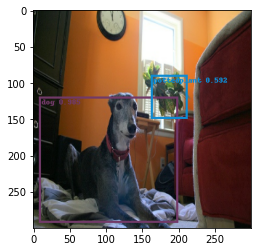

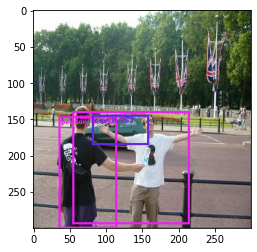

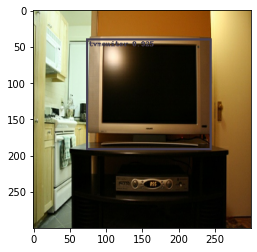

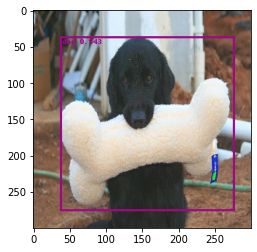

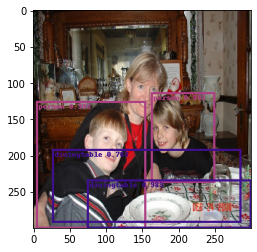

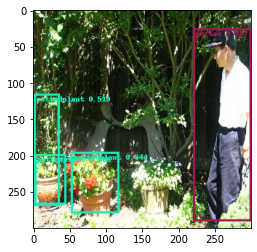

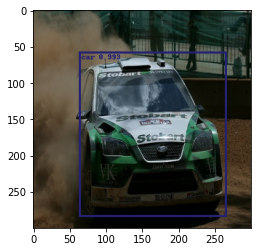

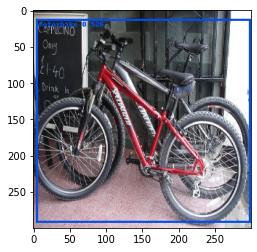

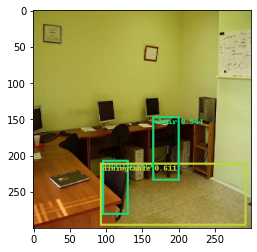

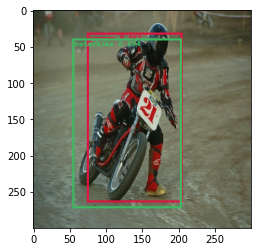

In [6]:
stats, mAP = evaluate_predictions(test_data, pred_bboxes, pred_labels, pred_scores, labels, batch_size)
draw_predictions(test_data, pred_bboxes, pred_labels, pred_scores, labels, batch_size, 10)

C:\Users\quach\AppData\Local\Temp/ipykernel_11180/1668882309.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10,10))


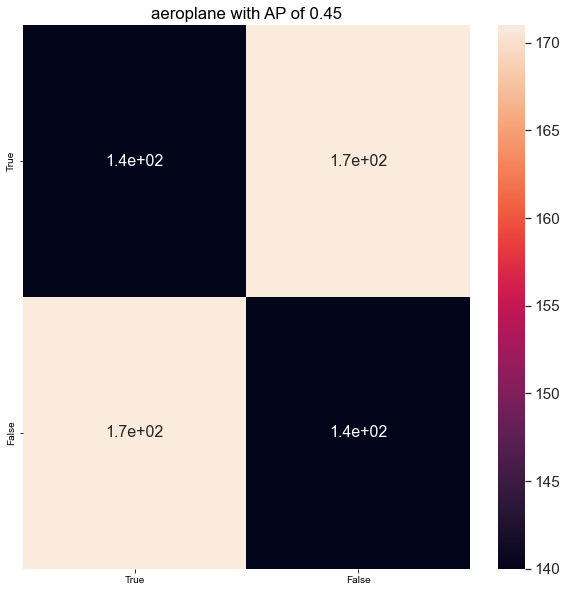

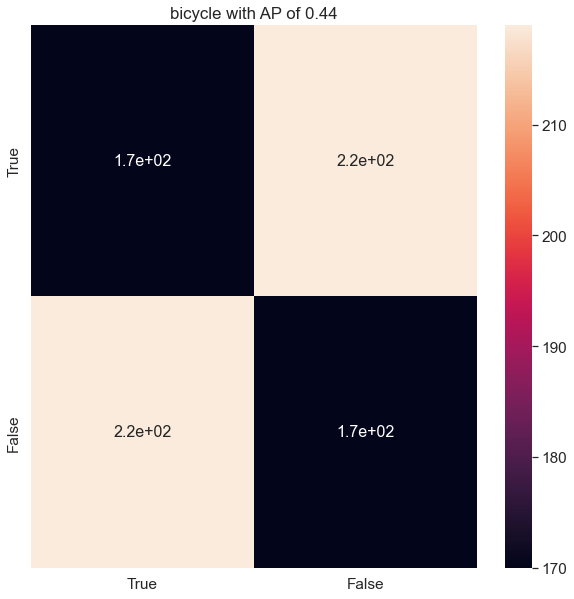

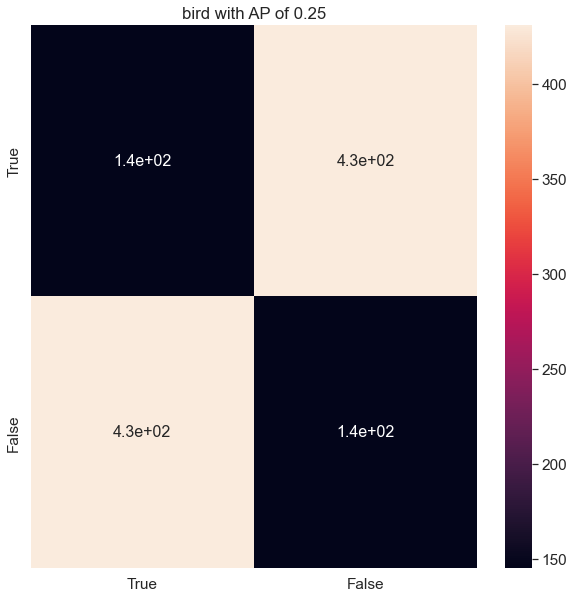

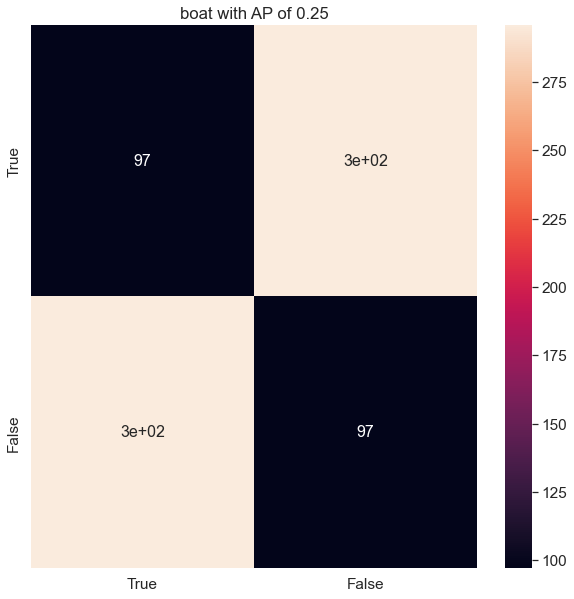

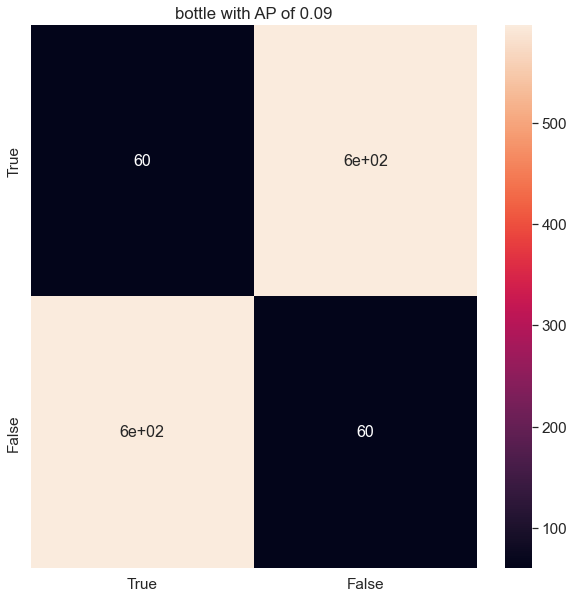

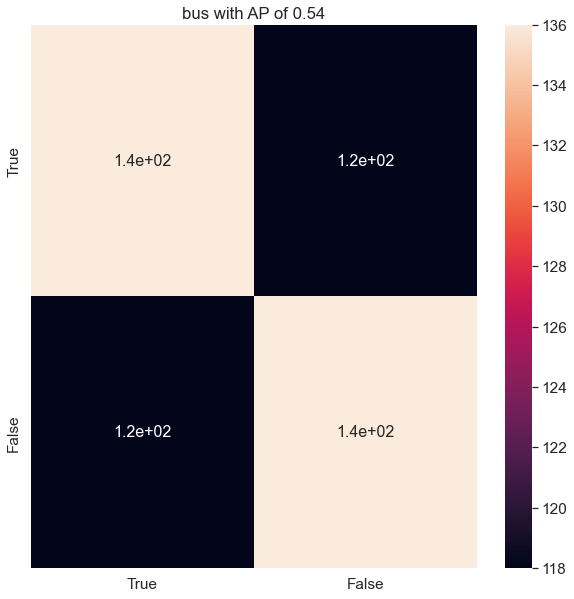

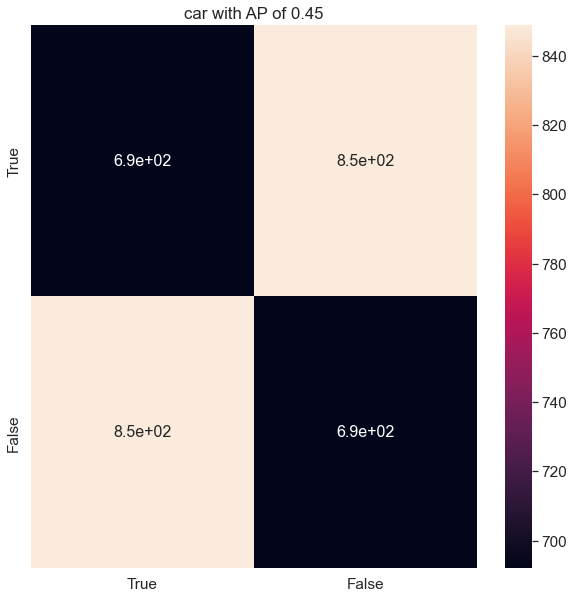

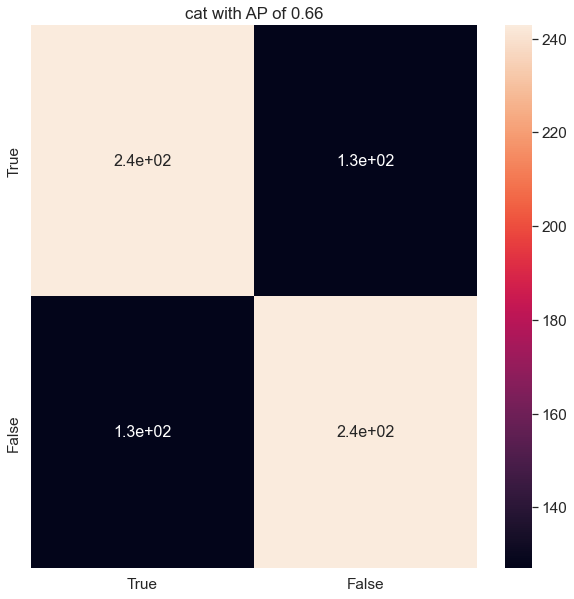

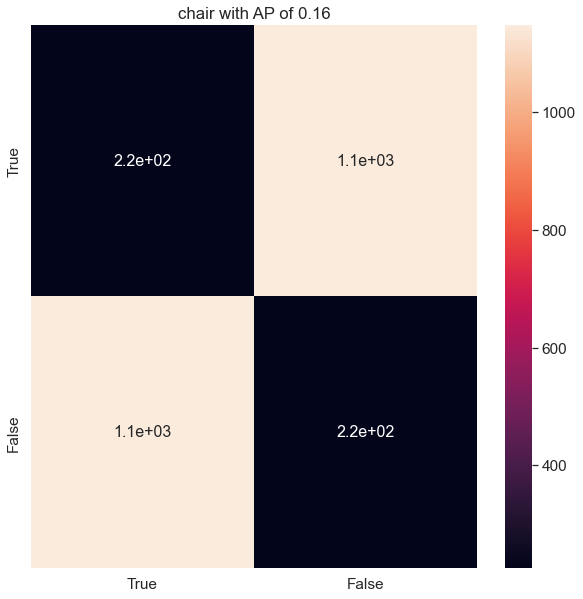

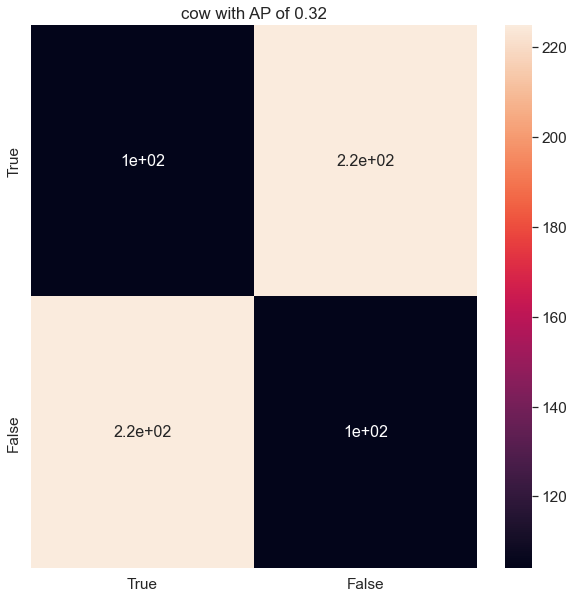

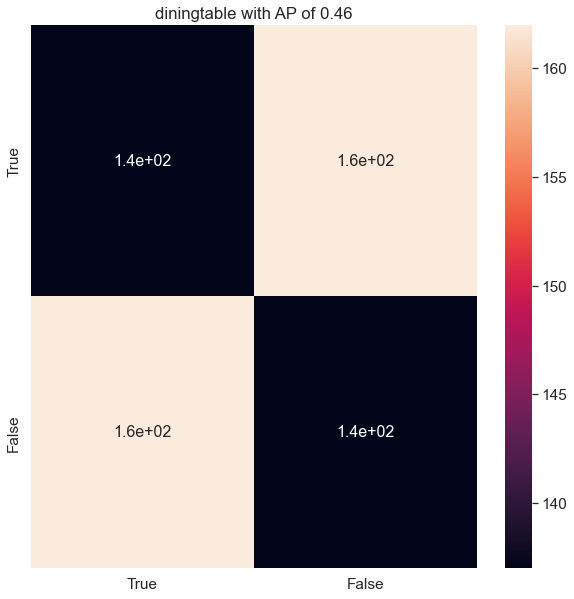

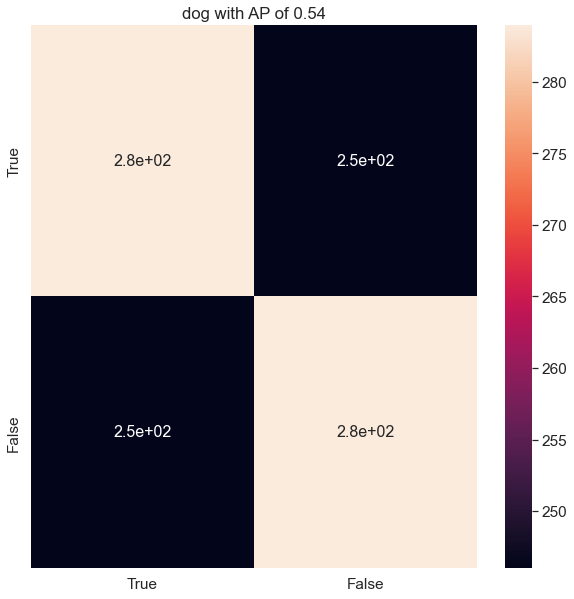

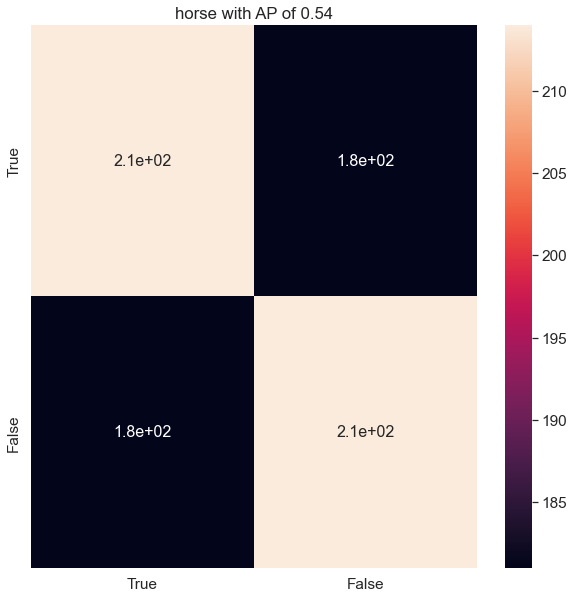

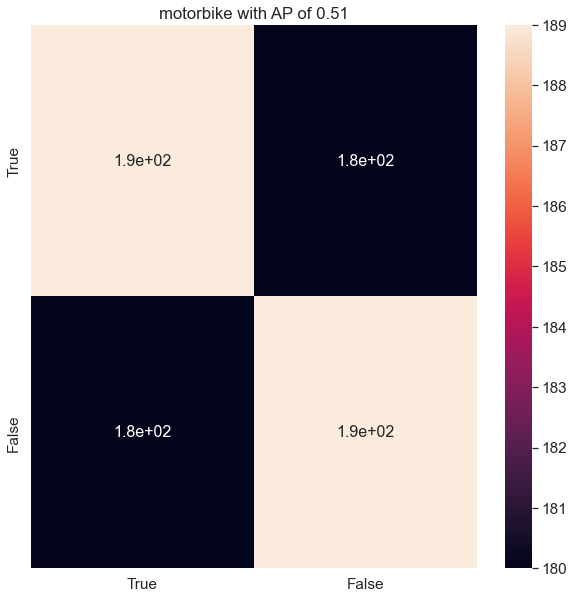

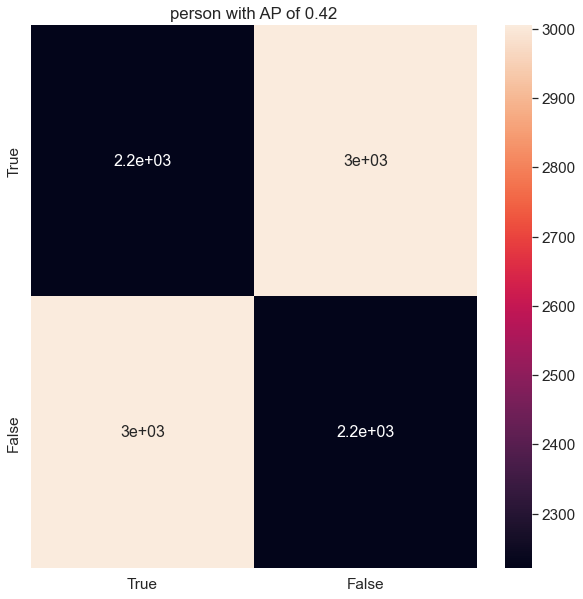

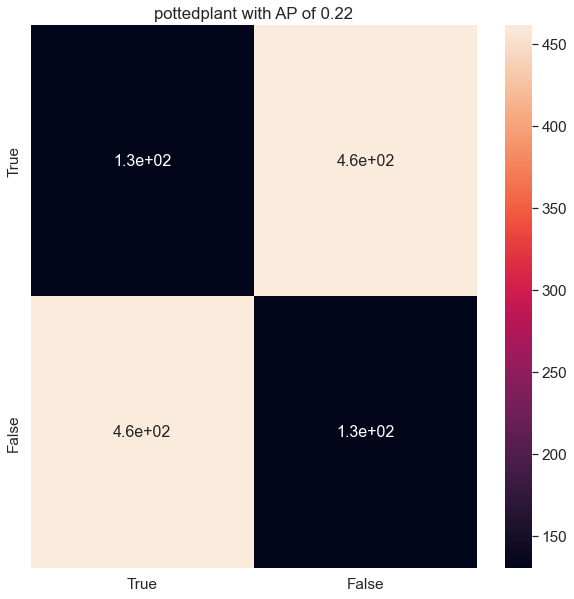

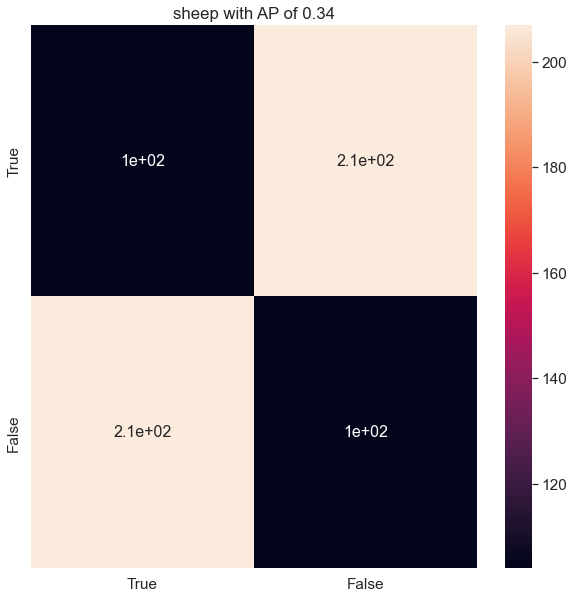

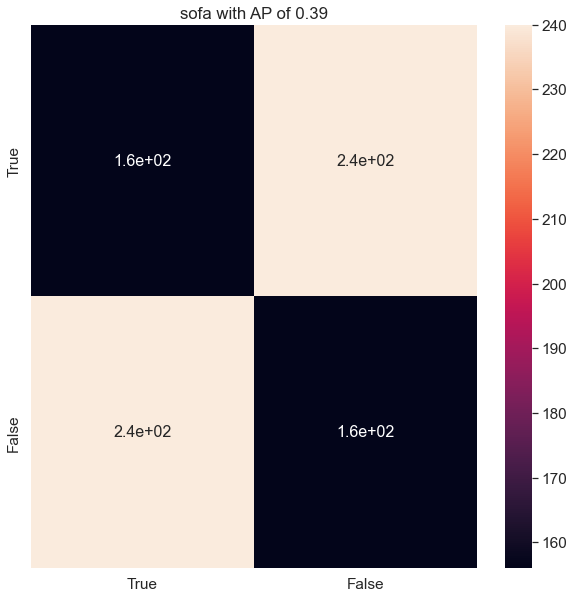

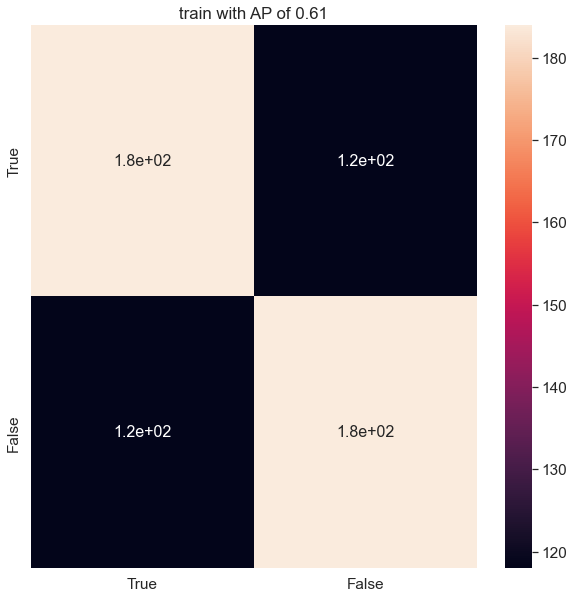

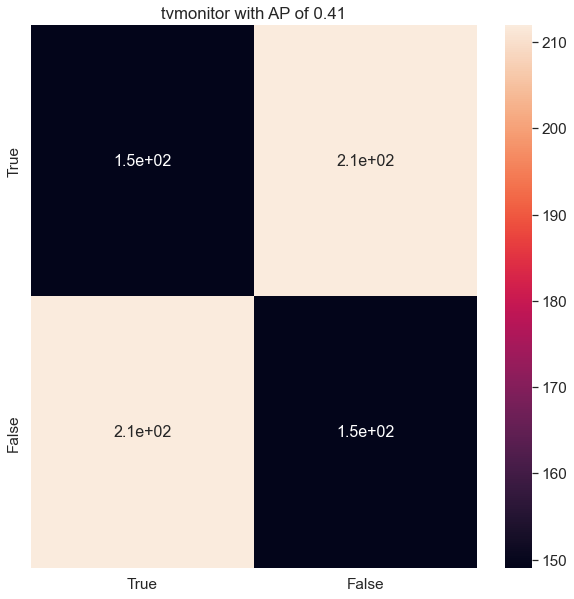

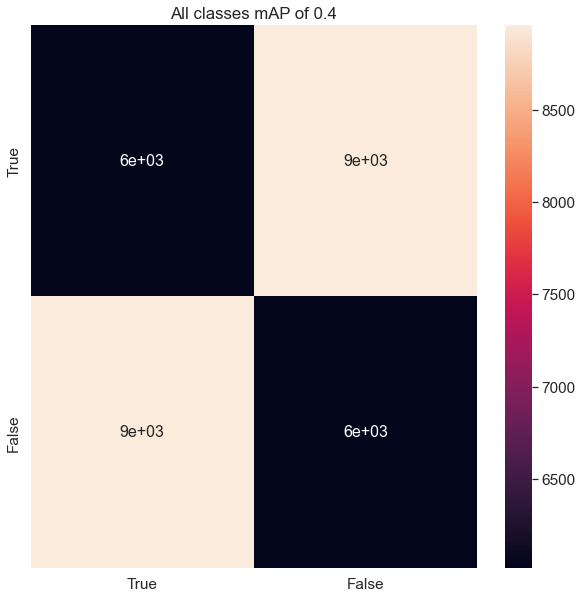

In [7]:
#Confusion matrix of each class
def cfm(stats):
    total = 0
    for label in stats:
        total += int(stats[label]['total'])
        tp = round(stats[label]['AP'] * stats[label]['total'])
        fp = stats[label]['total'] - tp

        array = [[tp,fp],[fp,tp]]
        df_cm = pd.DataFrame(array, ["True","False"], ["True","False"])

        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(1,1,1)
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
        ax.set_title("{} with AP of {}".format(stats[label]['label'], round(stats[label]['AP'],2)))
    #average
    tp = round(mAP * total)
    fp = total - tp

    array = [[tp,fp],[fp,tp]]
    df_cm = pd.DataFrame(array, ["True","False"], ["True","False"])

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1)
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    ax.set_title("All classes mAP of {}".format(round(mAP,2)))

cfm(stats)